In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from numpy.polynomial.polynomial import polyfit
import sklearn
from sklearn import datasets
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
import datetime
import os
import graphviz
from graphviz import Source
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_rows', 500)

In [2]:
import graphviz
from graphviz import Source

path = '/Users/LDPin/OneDrive/Área de Trabalho/University of Notre Dame/Freshman Year/Spring 2020/Research/tree.dot'
s = Source.from_file(path)


In [3]:
print (os.environ["PATH"])

C:\Users\LDPin\Anaconda3;C:\Users\LDPin\Anaconda3\Library\mingw-w64\bin;C:\Users\LDPin\Anaconda3\Library\usr\bin;C:\Users\LDPin\Anaconda3\Library\bin;C:\Users\LDPin\Anaconda3\Scripts;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\iCLS\;C:\Program Files\Intel\Intel(R) Management Engine Components\iCLS\;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\IPT;C:\Program Files\Intel\Intel(R) Management Engine Components\IPT;C:\WINDOWS\System32\OpenSSH\;C:\Program Files (x86)\PharosSystems\Core;C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\110\Tools\Binn\;C:\Program Files (x86)\Microsoft SQL Server\120\Tools\Binn\;C:\Program Files\Microsoft SQL Server\120\Tools\B

In [4]:
df0 = pd.read_csv("jplus_sspp.txt",sep=' ')
df0

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
0,0355-51788-0064,260.550224,56.905830,6076,4.213,-1.151,F5,17.526304,17.207840,17.092297,16.758161,16.709351,16.497959,16.416205,16.138050,16.092394,15.971630,15.972558,15.942645
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
3,0357-51813-0550,261.044995,56.208497,5646,3.337,-2.025,F5,18.129843,17.700920,17.620277,17.401062,17.290638,17.016707,16.900097,16.544029,16.492199,16.293610,16.253666,16.225510
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
6,0358-51818-0277,262.237362,56.366903,5721,4.479,-1.217,G2,17.471108,17.288258,17.161781,16.844524,16.734047,16.398077,16.264748,15.911975,15.878081,15.702483,15.685789,15.634157
7,0358-51818-0518,263.326016,57.008204,6048,4.040,-1.784,F5,19.284329,18.835606,18.813152,18.524963,18.693676,18.337357,18.269838,17.958914,17.886160,17.780407,17.740013,17.762138
8,0358-51818-0522,264.092504,57.595325,6404,4.225,-1.665,F5,19.019474,18.665943,18.536802,18.377125,18.193298,18.045948,17.902924,17.715183,17.698460,17.632582,17.557308,17.597729
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750


In [5]:
df1=df0[df0.TEFF>7500]
df1

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750
10,0358-51818-0555,264.506016,56.763370,7520,4.089,-1.113,A0,19.402348,18.737839,18.453316,18.196552,18.245270,18.057793,18.007175,18.026157,18.103848,18.115112,18.170582,18.111418
11,0358-51818-0584,264.708855,57.026715,7779,4.026,-1.211,A0,17.947752,17.322285,16.955818,16.784756,16.709492,16.719286,16.684387,16.676348,16.743443,16.719650,16.762789,16.744406
12,0367-51997-0605,261.364546,56.563424,7969,4.390,-1.337,A0,19.186386,18.780720,18.335800,17.916233,17.966175,17.914108,17.929800,18.006424,18.050779,18.041815,18.167316,18.161669
15,0431-51877-0414,113.938322,38.840945,8222,4.294,-1.154,A0,18.739458,18.199085,17.845818,17.489750,17.539259,17.419884,17.486351,17.492248,17.574257,17.573921,17.572670,17.647156
16,0432-51884-0187,115.168512,39.870432,7658,3.110,-1.511,A0,17.000877,16.193214,15.867228,15.629083,15.655346,15.595911,15.558558,15.534168,15.612087,15.567967,15.589592,15.619976


(array([62., 46., 51., 44., 55., 39., 32., 31., 36., 15.]),
 array([7502. , 7665.3, 7828.6, 7991.9, 8155.2, 8318.5, 8481.8, 8645.1,
        8808.4, 8971.7, 9135. ]),
 <a list of 10 Patch objects>)

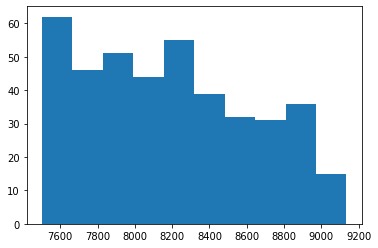

In [6]:
plt.hist(df1['TEFF'])

In [7]:
#Colors Indexes:
(uJAVA_J0378) = df1.uJAVA - df1.J0378
(uJAVA_J0410) = df1.uJAVA - df1.J0410
(uJAVA_J0660) = df1.uJAVA - df1.J0660
(uJAVA_J0861) = df1.uJAVA - df1.J0861
(J0378_J0410) = df1.J0378 - df1.J0410
(J0378_J0660) = df1.J0378 - df1.J0660
(J0378_J0861) = df1.J0378 - df1.J0861
(J0410_J0660) = df1.J0410 - df1.J0660
(J0410_J0861) = df1.J0410 - df1.J0861
(J0660_J0861) = df1.J0660 - df1.J0861
(gSDSS_rSDSS) = df1.gSDSS - df1.rSDSS

In [8]:
df2 = pd.DataFrame ({"TEFF": df1.TEFF, "uJAVA_J0378": (uJAVA_J0378), "uJAVA_J0410": (uJAVA_J0410), "uJAVA_J0660": (uJAVA_J0660), "uJAVA_J0861": (uJAVA_J0861), "J0378_J0410": (J0378_J0410), "J0378_J0660": (J0378_J0660), "J0378_J0861": (J0378_J0861), "J0410_J0660": (J0410_J0660), "J0410_J0861": (J0410_J0861), "J0660_J0861": (J0660_J0861), "gSDSS_rSDSS": (gSDSS_rSDSS)})
df2

,TEFF,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
1,8273,0.816465,1.424119,1.187652,1.145179,0.607654,0.371186,0.328713,-0.236467,-0.278940,-0.042473,-0.060044
2,8982,0.027954,0.229786,-0.154638,-0.130852,0.201832,-0.182592,-0.158806,-0.384424,-0.360638,0.023786,-0.165695
4,8774,0.799065,1.357873,0.991760,0.853123,0.558808,0.192696,0.054058,-0.366113,-0.504750,-0.138638,-0.188902
5,8041,0.859142,1.399881,1.341736,1.264149,0.540739,0.482594,0.405006,-0.058146,-0.135733,-0.077587,-0.009655
9,7849,0.693861,1.300110,1.200842,1.178429,0.606249,0.506981,0.484568,-0.099268,-0.121681,-0.022413,0.075565
10,7520,0.664509,1.205795,1.298500,1.231766,0.541286,0.633991,0.567257,0.092705,0.025970,-0.066734,0.031635
11,7779,0.625467,1.162996,1.204309,1.184963,0.537529,0.578842,0.559496,0.041313,0.021967,-0.019346,0.042938
12,7969,0.405666,1.270153,1.135607,1.019070,0.864487,0.729940,0.613403,-0.134546,-0.251083,-0.116537,-0.092316
15,8222,0.540373,1.249708,1.165201,1.166788,0.709335,0.624828,0.626415,-0.084507,-0.082920,0.001587,-0.072365
16,7658,0.807663,1.371795,1.388790,1.411285,0.564132,0.581127,0.603622,0.016996,0.039491,0.022495,0.061743


In [9]:
# Separate the label (target value) from the other features

labels = np.array(df2['TEFF'])
df3 = df2.drop('TEFF', axis = 1)

# Convert the features to a numpy array

df4 = np.array(df3)

# Create two lists of features for later use

df2_list = list(df2.columns)
df3_list = list(df3.columns)

In [10]:
# Split the data into training and testing sets

train_df4, test_df4, train_labels, test_labels = train_test_split(df4, labels, test_size = 0.25, random_state = 42)

In [11]:
# Just making sure that everything is alright so far

print('Training df4 Shape:', train_df4.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing df4 Shape:', test_df4.shape)
print('Testing Labels Shape:', test_labels.shape)

Training df4 Shape: (308, 11)
Training Labels Shape: (308,)
Testing df4 Shape: (103, 11)
Testing Labels Shape: (103,)


In [12]:
# Establish a baseline (average LOGG for all values)
# If the error predicted by the algorithm is greater than the error of the baseline, the algorithm is not effective

baseline_preds = test_df4[:, df2_list.index('TEFF')]

# Calculate the basiline errors

baseline_errors = abs(baseline_preds - test_labels)

# Print the average error

print('TEFF Baseline Error: ', round(np.mean(baseline_errors), 2))

# The error is too close to the average TEFF, which does not seem right
# ?????????????????????????????????????????????????????????????????????

TEFF Baseline Error:  8110.7


In [13]:
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data

rf.fit(train_df4, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [14]:
# Use the forest's predict method on the test data

predictions = rf.predict(test_df4)

# Calculate the absolute errors

errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 158.12


In [15]:
# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / test_labels)

# Calculate and display accuracy

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.06 %.


In [16]:
# Get numerical feature importances

importances = list(rf.feature_importances_)

# List of tuples with variable and importance

df3_importances0 = [(df3, round(importance, 2)) for df3, importance in zip(df3_list, importances)]

# Sort the feature importances by most important first

df3_importances = sorted(df3_importances0, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in df3_importances]

Variable: J0410_J0861          Importance: 0.62
Variable: J0410_J0660          Importance: 0.15
Variable: uJAVA_J0861          Importance: 0.07
Variable: uJAVA_J0660          Importance: 0.04
Variable: J0378_J0410          Importance: 0.02
Variable: J0378_J0861          Importance: 0.02
Variable: J0660_J0861          Importance: 0.02
Variable: gSDSS_rSDSS          Importance: 0.02
Variable: uJAVA_J0378          Importance: 0.01
Variable: uJAVA_J0410          Importance: 0.01
Variable: J0378_J0660          Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importances')

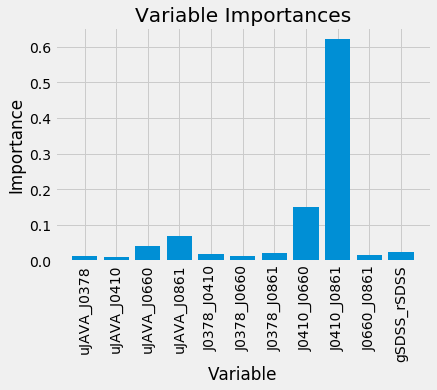

In [17]:
# Use magic command for Jupyter Notebooks

%matplotlib inline

# Set the style

plt.style.use('fivethirtyeight')

# list of x locations for plotting

x_values = list(range(len(importances)))

# Make a bar chart

plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis

plt.xticks(x_values, df3_list, rotation='vertical')

# Axis labels and title

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

y= 2223.889431630229 + 0.7263083829470447 *x
0.7619314128428883


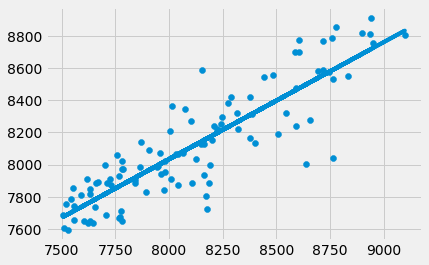

In [18]:
plt.scatter(test_labels,predictions)
b,m = polyfit (test_labels,predictions,1)
np.corrcoef(test_labels,predictions)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(test_labels,b+m*test_labels)
a = np.corrcoef(test_labels,predictions)[0,1]
print(a**2)

The average residual is 3.8970097087378623
The standard deviation of the residual is 203.6875261164195


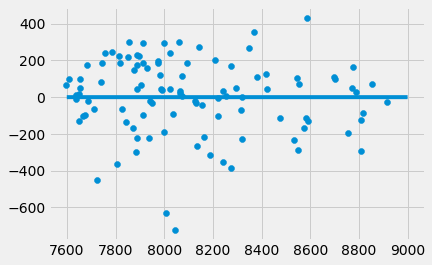

In [19]:
plt.scatter(predictions,predictions-test_labels)
x_const=np.arange(7600,9000)
y_const=[0]*len(x_const)
plt.plot(x_const,y_const)

avgres = np.mean(predictions-test_labels)
stdres = np.std(predictions-test_labels)

print('The average residual is', avgres)
print('The standard deviation of the residual is', stdres)

In [20]:
# New random forest with only the two most important variables

rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features

important_indices = [df3_list.index('J0410_J0861'), df3_list.index('J0410_J0660')]
train_important = train_df4[:, important_indices]
test_important = test_df4[:, important_indices]

# Train the random forest

rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error

predictions2 = rf_most_important.predict(test_important)
errors2 = abs(predictions2 - test_labels)

# Display the performance metrics

print('Mean Absolute Error:', round(np.mean(errors2), 2))
mape2 = np.mean(100 * (errors2 / test_labels))
accuracy2 = 100 - mape2
print('Accuracy:', round(accuracy2, 2), '%.')

Mean Absolute Error: 226.64
Accuracy: 97.23 %.


In [21]:
# Pull out one tree from the forest

estimator = rf.estimators_[5]

# Export as dot file

export_graphviz(estimator, out_file='tree.dot', feature_names = df3_list, proportion = False, rounded = True, precision = 1, filled = True)

# Use dot file to create a graph

(graph,) = pydot.graph_from_dot_file('tree.dot')

path = '/Users/LDPin/OneDrive/Área de Trabalho/University of Notre Dame/Freshman Year/Spring 2020/Research/tree.dot'
s = Source.from_file(path)


In [22]:
# It is necessary to get rid of the outliers

predictions2 = rf.predict(df4)
avgres2 = np.mean(predictions2-df2.TEFF)
stdres2 = np.std(predictions2-df2.TEFF)
df5 = df2[predictions2-df2.TEFF<avgres2+2*stdres2]
df6 = df5.drop('TEFF', axis = 1)
predictions3 = rf.predict(df6)
avgres3 = np.mean(predictions3-df5.TEFF)
stdres3 = np.std(predictions3-df5.TEFF)
df6 = df5[avgres3-2*stdres3<predictions3-df5.TEFF]
df6

,TEFF,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
1,8273,0.816465,1.424119,1.187652,1.145179,0.607654,0.371186,0.328713,-0.236467,-0.278940,-0.042473,-0.060044
2,8982,0.027954,0.229786,-0.154638,-0.130852,0.201832,-0.182592,-0.158806,-0.384424,-0.360638,0.023786,-0.165695
4,8774,0.799065,1.357873,0.991760,0.853123,0.558808,0.192696,0.054058,-0.366113,-0.504750,-0.138638,-0.188902
5,8041,0.859142,1.399881,1.341736,1.264149,0.540739,0.482594,0.405006,-0.058146,-0.135733,-0.077587,-0.009655
9,7849,0.693861,1.300110,1.200842,1.178429,0.606249,0.506981,0.484568,-0.099268,-0.121681,-0.022413,0.075565
10,7520,0.664509,1.205795,1.298500,1.231766,0.541286,0.633991,0.567257,0.092705,0.025970,-0.066734,0.031635
11,7779,0.625467,1.162996,1.204309,1.184963,0.537529,0.578842,0.559496,0.041313,0.021967,-0.019346,0.042938
12,7969,0.405666,1.270153,1.135607,1.019070,0.864487,0.729940,0.613403,-0.134546,-0.251083,-0.116537,-0.092316
15,8222,0.540373,1.249708,1.165201,1.166788,0.709335,0.624828,0.626415,-0.084507,-0.082920,0.001587,-0.072365
16,7658,0.807663,1.371795,1.388790,1.411285,0.564132,0.581127,0.603622,0.016996,0.039491,0.022495,0.061743


In [23]:
# Now, it is necessary to repeat the random forest calculations with the reduced sample

# Separate the label (target value) from the other features

labels2 = np.array(df6['TEFF'])
df7 = df6.drop('TEFF', axis = 1)

# Convert the features to a numpy array

df8 = np.array(df7)

# Create two lists of features for later use

df6_list = list(df6.columns)
df7_list = list(df7.columns)

In [24]:
# Split the data into training and testing sets

train_df8, test_df8, train_labels2, test_labels2 = train_test_split(df8, labels2, test_size = 0.25, random_state = 42)

In [25]:
# Just making sure that everything is alright so far

print('Training df8 Shape:', train_df8.shape)
print('Training Labels Shape:', train_labels2.shape)
print('Testing df8 Shape:', test_df8.shape)
print('Testing Labels Shape:', test_labels2.shape)

Training df8 Shape: (291, 11)
Training Labels Shape: (291,)
Testing df8 Shape: (97, 11)
Testing Labels Shape: (97,)


In [26]:
# Instantiate model with 1000 decision trees

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data

rf2.fit(train_df8, train_labels2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [27]:
# Use the forest's predict method on the test data

predictions4 = rf2.predict(test_df8)

# Calculate the absolute errors

errors4 = abs(predictions4 - test_labels2)

# Print out the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors4), 2))

Mean Absolute Error: 127.17


In [28]:
# Calculate mean absolute percentage error (MAPE)

mape3 = 100 * (errors4 / test_labels2)

# Calculate and display accuracy

accuracy3 = 100 - np.mean(mape3)
print('Accuracy:', round(accuracy3, 2), '%.')

Accuracy: 98.44 %.


In [29]:
# Get numerical feature importances

importances2 = list(rf2.feature_importances_)

# List of tuples with variable and importance

df7_importances0 = [(df7, round(importance, 2)) for df7, importance in zip(df7_list, importances2)]

# Sort the feature importances by most important first

df7_importances = sorted(df7_importances0, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in df7_importances]

Variable: J0410_J0861          Importance: 0.68
Variable: J0410_J0660          Importance: 0.1
Variable: uJAVA_J0861          Importance: 0.06
Variable: uJAVA_J0660          Importance: 0.04
Variable: uJAVA_J0378          Importance: 0.02
Variable: J0378_J0410          Importance: 0.02
Variable: J0378_J0861          Importance: 0.02
Variable: gSDSS_rSDSS          Importance: 0.02
Variable: uJAVA_J0410          Importance: 0.01
Variable: J0378_J0660          Importance: 0.01
Variable: J0660_J0861          Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importances')

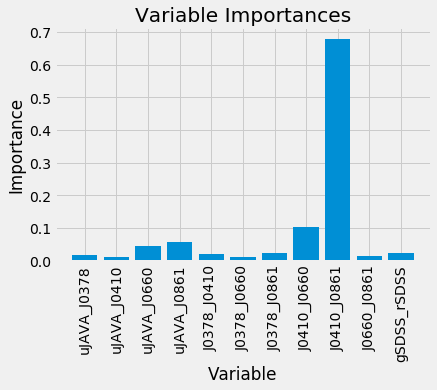

In [30]:
# Use magic command for Jupyter Notebooks

%matplotlib inline

# Set the style

plt.style.use('fivethirtyeight')

# list of x locations for plotting

x_values = list(range(len(importances2)))

# Make a bar chart

plt.bar(x_values, importances2, orientation = 'vertical')

# Tick labels for x axis

plt.xticks(x_values, df7_list, rotation='vertical')

# Axis labels and title

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

y= 1347.4221871043792 + 0.8374526709431631 *x
0.8905241070514281


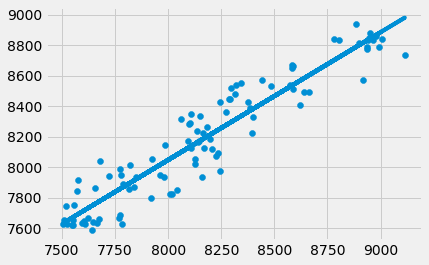

In [31]:
plt.scatter(test_labels2,predictions4)
b,m = polyfit (test_labels2,predictions4,1)
np.corrcoef(test_labels2,predictions4)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(test_labels2,b+m*test_labels2)
a = np.corrcoef(test_labels2,predictions4)[0,1]
print(a**2)

NameError: name 'avgres4' is not defined

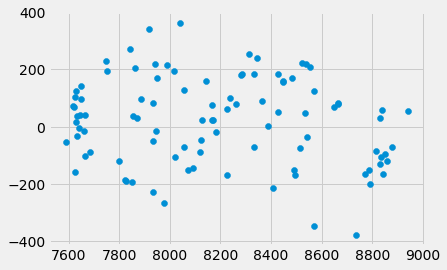

In [32]:
plt.scatter(predictions4,predictions4-test_labels2)
x_const=np.arange(7600,9000)
y_const=[avgres4]*len(x_const)
plt.plot(x_const,y_const)

avgres4 = np.mean(predictions4-test_labels2)
stdres4 = np.std(predictions4-test_labels2)

print('The average residual is', avgres4)
print('The standard deviation of the residual is', stdres4)

In [33]:
# Pull out one tree from the forest

estimator = rf2.estimators_[5]

# Export as dot file

export_graphviz(estimator, out_file='tree_TEFF_2.dot', feature_names = df7_list, proportion = False, rounded = True, precision = 1, filled = True)

# Use dot file to create a graph

(graph,) = pydot.graph_from_dot_file('tree_TEFF_2.dot')

# Write graph to a PDF file

path = '/Users/LDPin/OneDrive/Área de Trabalho/University of Notre Dame/Freshman Year/Spring 2020/Research/tree_TEFF_2.dot'
s = Source.from_file(path)
s.view()
# Only run s.view() to generate the PDF once

'/Users/LDPin/OneDrive/Área de Trabalho/University of Notre Dame/Freshman Year/Spring 2020/Research\\tree_TEFF_2.dot.pdf'

In [34]:
# It is also possible to try to control the hyperparameters in order to get a better result

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf3 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf3_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf3_random.fit(train_df8, train_labels2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                                                   n_jobs=None, oob_score=False,
                                                   random_state...


In [35]:
rf3_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [36]:
def evaluate(model, test_df8, test_labels2):
    predictions5 = model.predict(test_df8)
    errors5 = abs(predictions5 - test_labels2)
    mape5 = 100 * np.mean(errors5 / test_labels2)
    accuracy5 = 100 - mape5
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors5)))
    print('Accuracy = {:0.2f}%.'.format(accuracy5))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_df8, train_labels2)
base_accuracy = evaluate(base_model, test_df8, test_labels2)

Model Performance
Average Error: 138.8825
Accuracy = 98.29%.


In [37]:
best_random = rf3_random.best_estimator_
random_accuracy = evaluate(best_random, test_df8, test_labels2)

Model Performance
Average Error: 129.0148
Accuracy = 98.42%.


In [38]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [39]:
rf4 = RandomForestRegressor(n_estimators = 600, min_samples_split = 2, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 60, bootstrap = False)
rf4.fit(train_df8,train_labels2)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=60,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
# Get numerical feature importances

importances = list(rf4.feature_importances_)

# List of tuples with variable and importance

df7_importances0 = [(df7, round(importance, 2)) for df7, importance in zip(df7_list, importances)]

# Sort the feature importances by most important first

df7_importances = sorted(df7_importances0, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in df7_importances]

Variable: J0410_J0861          Importance: 0.29
Variable: J0410_J0660          Importance: 0.23
Variable: J0378_J0861          Importance: 0.14
Variable: gSDSS_rSDSS          Importance: 0.11
Variable: uJAVA_J0861          Importance: 0.07
Variable: J0378_J0660          Importance: 0.06
Variable: uJAVA_J0660          Importance: 0.04
Variable: J0378_J0410          Importance: 0.03
Variable: uJAVA_J0410          Importance: 0.02
Variable: J0660_J0861          Importance: 0.02
Variable: uJAVA_J0378          Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importances')

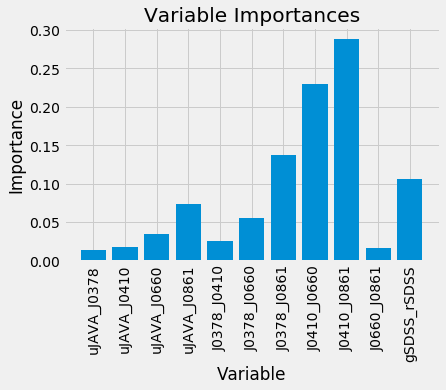

In [41]:
# Use magic command for Jupyter Notebooks

%matplotlib inline

# Set the style

plt.style.use('fivethirtyeight')

# list of x locations for plotting

x_values = list(range(len(importances)))

# Make a bar chart

plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis

plt.xticks(x_values, df7_list, rotation='vertical')

# Axis labels and title

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

In [42]:
max1 = df2['J0410_J0861'].mean()+1*df2['J0410_J0861'].std()
min1 = df2['J0410_J0861'].mean()-1*df2['J0410_J0861'].std()
max2 = df2['J0410_J0660'].mean()+1*df2['J0410_J0660'].std()
min2 = df2['J0410_J0861'].mean()-1*df2['J0410_J0660'].std()
max3 = df2['J0378_J0861'].mean()+1*df2['J0378_J0861'].std()
min3 = df2['J0378_J0861'].mean()-1*df2['J0378_J0861'].std()
print(max1)
print(min1)
print(max2)
print(min2)
print(max3)
print(min3)

# USE gSDSS-rSDSS INSTEAD!

0.06474185162227328
-0.4677263285079183
0.05262000479955778
-0.3949660252375141
0.6710741016889386
0.013850609746584419


In [43]:
# Myabe plot the line and the residual here again

In [44]:
# Extract the two most important features

important_indices2 = [df7_list.index('uJAVA_J0378'), df7_list.index('uJAVA_J0410'), df7_list.index('J0410_J0660')]
train_important2 = train_df8[:, important_indices2]
test_important2 = test_df8[:, important_indices2]


# Make predictions and determine the error

predictions = rf4.predict(test_important2)
errors = abs(predictions - test_labels2)

# Display the performance metrics

print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / test_labels2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 3 

In [45]:
dft1_filters = pd.read_csv('Data.csv', sep = ',')
dft1_filters

,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
0,13.433,13.821,13.315,13.272,14.996,14.622,14.571,14.145,14.094,13.695,13.407,13.307
1,13.807,14.296,13.678,13.625,15.687,15.438,15.299,14.730,14.663,14.135,13.783,13.658
2,15.048,15.035,15.077,15.085,16.443,15.543,15.161,14.984,14.999,14.937,15.061,15.102
3,13.236,14.090,12.876,12.678,16.274,16.128,15.816,14.921,14.677,13.926,13.041,12.740
4,14.192,14.915,13.843,13.653,16.917,16.622,16.378,15.632,15.456,14.629,13.997,13.704
5,15.059,15.501,14.918,14.874,16.844,16.558,16.469,15.923,15.832,15.353,15.029,14.909
6,14.407,14.776,14.287,14.263,15.973,15.647,15.599,15.126,15.068,14.668,14.396,14.281
7,14.755,15.086,14.573,14.492,16.134,15.756,15.684,15.315,15.257,14.900,14.639,14.534
8,13.549,14.056,13.314,13.233,15.617,15.448,15.259,14.516,14.403,13.825,13.396,13.264
9,15.097,15.606,14.900,14.855,16.961,16.647,16.660,16.019,15.994,15.432,15.052,14.873


In [46]:
(uJAVA_J0378) = dft1_filters.uJAVA - dft1_filters.J0378
(uJAVA_J0410) = dft1_filters.uJAVA - dft1_filters.J0410
(uJAVA_J0660) = dft1_filters.uJAVA - dft1_filters.J0660
(uJAVA_J0861) = dft1_filters.uJAVA - dft1_filters.J0861
(J0378_J0410) = dft1_filters.J0378 - dft1_filters.J0410
(J0378_J0660) = dft1_filters.J0378 - dft1_filters.J0660
(J0378_J0861) = dft1_filters.J0378 - dft1_filters.J0861
(J0410_J0660) = dft1_filters.J0410 - dft1_filters.J0660
(J0410_J0861) = dft1_filters.J0410 - dft1_filters.J0861
(J0660_J0861) = dft1_filters.J0660 - dft1_filters.J0861
(gSDSS_rSDSS) = dft1_filters.gSDSS - dft1_filters.rSDSS

In [47]:
dft1_colors = pd.DataFrame ({"uJAVA_J0378": (uJAVA_J0378), "uJAVA_J0410": (uJAVA_J0410), "uJAVA_J0660": (uJAVA_J0660), "uJAVA_J0861": (uJAVA_J0861), "J0378_J0410": (J0378_J0410), "J0378_J0660": (J0378_J0660), "J0378_J0861": (J0378_J0861), "J0410_J0660": (J0410_J0660), "J0410_J0861": (J0410_J0861), "J0660_J0861": (J0660_J0861), "gSDSS_rSDSS": (gSDSS_rSDSS)})
dft1_colors

,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
0,-0.388,0.161,-0.661,0.026,0.549,-0.273,0.414,-0.822,-0.135,0.687,0.477
1,-0.489,0.182,-0.856,0.024,0.671,-0.367,0.513,-1.038,-0.158,0.880,0.708
2,0.013,-0.037,0.049,-0.013,-0.050,0.036,-0.026,0.086,0.024,-0.062,0.559
3,-0.854,0.558,-1.441,0.195,1.412,-0.587,1.049,-1.999,-0.363,1.636,1.207
4,-0.723,0.539,-1.264,0.195,1.262,-0.541,0.918,-1.803,-0.344,1.459,0.990
5,-0.442,0.185,-0.773,0.030,0.627,-0.331,0.472,-0.958,-0.155,0.803,0.635
6,-0.369,0.144,-0.661,0.011,0.513,-0.292,0.380,-0.805,-0.133,0.672,0.521
7,-0.331,0.263,-0.502,0.116,0.594,-0.171,0.447,-0.765,-0.147,0.618,0.441
8,-0.507,0.316,-0.854,0.153,0.823,-0.347,0.660,-1.170,-0.163,1.007,0.932
9,-0.509,0.242,-0.897,0.045,0.751,-0.388,0.554,-1.139,-0.197,0.942,0.628


In [48]:
max1 = df2['J0410_J0861'].mean()+2*df2['J0410_J0861'].std()
min1 = df2['J0410_J0861'].mean()-2*df2['J0410_J0861'].std()
max2 = df2['J0410_J0660'].mean()+2*df2['J0410_J0660'].std()
min2 = df2['J0410_J0861'].mean()-2*df2['J0410_J0660'].std()
max3 = df2['J0378_J0861'].mean()+2*df2['J0378_J0861'].std()
min3 = df2['J0378_J0861'].mean()-2*df2['J0378_J0861'].std()
print(max1)
print(min1)
print(max2)
print(min2)
print(max3)
print(min3)

0.3309759416873691
-0.7339604185730141
0.2460937915942494
-0.5884398120322057
0.9996858476601157
-0.3147611362245927


In [49]:
dft2_colors = dft1_colors[dft1_colors.J0410_J0861>min1]
dft3_colors = dft2_colors[dft2_colors.J0410_J0861<max1]
dft4_colors = dft3_colors[dft3_colors.J0410_J0660>min2]
dft5_colors = dft4_colors[dft4_colors.J0410_J0660<max2]
dft6_colors = dft5_colors[dft5_colors.J0378_J0861>min3]
dft7_colors = dft6_colors[dft6_colors.J0378_J0861<max3]
dft7_colors

,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
2,0.013,-0.037,0.049,-0.013,-0.050,0.036,-0.026,0.086,0.024,-0.062,0.559
29,-0.261,0.134,-0.365,0.066,0.395,-0.104,0.327,-0.499,-0.068,0.431,0.464
57,-0.296,0.109,-0.466,-0.005,0.405,-0.170,0.291,-0.575,-0.114,0.461,0.374
85,-0.277,0.070,-0.453,-0.016,0.347,-0.176,0.261,-0.523,-0.086,0.437,0.458
119,-0.169,0.073,-0.202,0.038,0.242,-0.033,0.207,-0.275,-0.035,0.240,0.483
120,-0.269,0.082,-0.448,-0.009,0.351,-0.179,0.260,-0.530,-0.091,0.439,0.435
126,-0.263,0.043,-0.455,-0.011,0.306,-0.192,0.252,-0.498,-0.054,0.444,0.495
129,-0.251,0.058,-0.413,-0.012,0.309,-0.162,0.239,-0.471,-0.070,0.401,0.479
130,-0.273,0.042,-0.474,-0.006,0.315,-0.201,0.267,-0.516,-0.048,0.468,0.562
142,-0.291,0.093,-0.459,-0.019,0.384,-0.168,0.272,-0.552,-0.112,0.440,0.374


In [50]:
max1 = 0.18
min1 = -0.25

dft8_colors = dft1_colors[dft1_colors.gSDSS_rSDSS>min1]
dft9_colors = dft8_colors[dft8_colors.gSDSS_rSDSS<max1]
dft9_colors

,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
265,0.345,-0.478,0.444,-0.187,-0.823,0.099,-0.532,0.922,0.291,-0.631,0.009
4689,-0.207,0.359,-0.348,0.067,0.566,-0.141,0.274,-0.707,-0.292,0.415,0.031
6822,0.491,-0.661,0.626,-0.148,-1.152,0.135,-0.639,1.287,0.513,-0.774,-0.134
6838,-0.236,0.315,-0.414,0.017,0.551,-0.178,0.253,-0.729,-0.298,0.431,-0.024
7344,-0.192,-0.148,-0.293,-0.015,0.044,-0.101,0.177,-0.145,0.133,0.278,0.102
9269,0.026,-0.097,-0.062,-0.187,-0.123,-0.088,-0.213,0.035,-0.090,-0.125,0.092
9948,0.414,-0.614,0.587,-0.151,-1.028,0.173,-0.565,1.201,0.463,-0.738,-0.008
10195,0.515,-0.683,0.702,-0.158,-1.198,0.187,-0.673,1.385,0.525,-0.860,-0.144
11959,0.071,-0.026,0.106,0.024,-0.097,0.035,-0.047,0.132,0.050,-0.082,0.023
14341,-0.101,0.162,-0.106,0.075,0.263,-0.005,0.176,-0.268,-0.087,0.181,0.078


In [51]:
newpredictions = best_random.predict(dft9_colors)
newpredictions

array([7941.28072529, 8449.63892569, 7990.00851308, 8447.23904672,
       8026.38103626, 8091.07203175, 7945.95745256, 7989.74767379,
       7932.57101091, 8276.02938492, 8374.42022348, 7940.73845256,
       7973.19280375, 8260.19329113, 7940.27792172, 7980.83770058,
       7930.72860083, 7988.37225812, 8449.53376118, 8014.35383577,
       8060.31197222, 8057.52897421, 8189.9095119 , 7936.91742226,
       7944.01323927, 8299.0175625 , 7952.73864899, 7935.47593173,
       7987.58113212, 7935.13161219, 7927.95016008, 7976.15971979,
       7944.73082161, 8087.98187897, 7925.57171979, 7934.29485083,
       8636.62198359, 7936.23905916, 7944.9779228 , 8060.26776732,
       7928.05661815, 7939.86360976, 7936.57047583, 7986.0396351 ,
       8336.90298313, 8450.29420942, 7943.78528589, 7983.926148  ,
       7932.60983378, 7929.40666035, 8428.99127011, 7995.34056367,
       7935.07079428, 7942.13952498, 7936.39395148, 8155.46233775,
       7941.17269661, 7929.24076335, 7978.37587518, 7986.79198

(array([ 0.,  0.,  0.,  0.,  0.,  0., 40., 28.,  4., 21.,  2.,  4.,  1.,
         3.,  2.,  3.,  1.,  2.,  2.,  1.,  0.,  2.,  1.,  3.,  2.,  0.,
         2.,  0.,  1.,  1.,  0.,  2.,  4.,  3.,  2.,  0.,  0.,  0.,  0.]),
 array([7800, 7820, 7840, 7860, 7880, 7900, 7920, 7940, 7960, 7980, 8000,
        8020, 8040, 8060, 8080, 8100, 8120, 8140, 8160, 8180, 8200, 8220,
        8240, 8260, 8280, 8300, 8320, 8340, 8360, 8380, 8400, 8420, 8440,
        8460, 8480, 8500, 8520, 8540, 8560, 8580]),
 <a list of 39 Patch objects>)

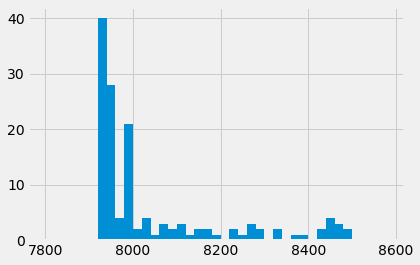

In [52]:
plt.hist(newpredictions, bins = np.arange(7800, 8600, 20))

In [53]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
import astroquery.utils

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [54]:
dft1 = pd.read_csv('25290.csv')
dft1

,TILE_ID,NUMBER,ALPHA_J2000,DELTA_J2000,FWHM_WORLD,MAG_APER_6_0,morph_prob_star
0,26381,18016,19.580593,4.763881,0.000293,13.433 13.821 13.315 13.272 14.996 14.622 14.5...,1.0
1,26381,18040,20.308061,4.761765,0.000285,13.807 14.296 13.678 13.625 15.687 15.438 15.2...,1.0
2,26063,6371,148.368790,31.489769,0.000357,15.048 15.035 15.077 15.085 16.443 15.543 15.1...,1.0
3,26063,6418,148.270261,31.488841,0.000368,13.236 14.090 12.876 12.678 16.274 16.128 15.8...,1.0
4,26063,6428,147.476431,31.494790,0.000380,14.192 14.915 13.843 13.653 16.917 16.622 16.3...,1.0
5,26057,2311,138.927426,31.261801,0.000313,15.059 15.501 14.918 14.874 16.844 16.558 16.4...,1.0
6,26057,2321,137.878311,31.261267,0.000326,14.407 14.776 14.287 14.263 15.973 15.647 15.5...,1.0
7,26063,6459,147.626353,31.495017,0.000381,14.755 15.086 14.573 14.492 16.134 15.756 15.6...,1.0
8,26063,6582,147.253598,31.498664,0.000389,13.549 14.056 13.314 13.233 15.617 15.448 15.2...,1.0
9,26269,680,229.816578,54.809231,0.000279,15.097 15.606 14.900 14.855 16.961 16.647 16.6...,1.0


In [55]:
dft1_filters = pd.read_csv('Data.csv', sep = ',')
dft1_filters

,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
0,13.433,13.821,13.315,13.272,14.996,14.622,14.571,14.145,14.094,13.695,13.407,13.307
1,13.807,14.296,13.678,13.625,15.687,15.438,15.299,14.730,14.663,14.135,13.783,13.658
2,15.048,15.035,15.077,15.085,16.443,15.543,15.161,14.984,14.999,14.937,15.061,15.102
3,13.236,14.090,12.876,12.678,16.274,16.128,15.816,14.921,14.677,13.926,13.041,12.740
4,14.192,14.915,13.843,13.653,16.917,16.622,16.378,15.632,15.456,14.629,13.997,13.704
5,15.059,15.501,14.918,14.874,16.844,16.558,16.469,15.923,15.832,15.353,15.029,14.909
6,14.407,14.776,14.287,14.263,15.973,15.647,15.599,15.126,15.068,14.668,14.396,14.281
7,14.755,15.086,14.573,14.492,16.134,15.756,15.684,15.315,15.257,14.900,14.639,14.534
8,13.549,14.056,13.314,13.233,15.617,15.448,15.259,14.516,14.403,13.825,13.396,13.264
9,15.097,15.606,14.900,14.855,16.961,16.647,16.660,16.019,15.994,15.432,15.052,14.873


In [56]:
(gSDSS_rSDSS) = dft1_filters.gSDSS - dft1_filters.rSDSS

In [57]:
dft2 = pd.DataFrame ({"ALPHA_J2000": dft1.ALPHA_J2000, "DELTA_J2000": dft1.DELTA_J2000, "gSDSS_rSDSS": (gSDSS_rSDSS)})
dft2

,ALPHA_J2000,DELTA_J2000,gSDSS_rSDSS
0,19.580593,4.763881,0.477
1,20.308061,4.761765,0.708
2,148.368790,31.489769,0.559
3,148.270261,31.488841,1.207
4,147.476431,31.494790,0.990
5,138.927426,31.261801,0.635
6,137.878311,31.261267,0.521
7,147.626353,31.495017,0.441
8,147.253598,31.498664,0.932
9,229.816578,54.809231,0.628


In [58]:
min1 = -0.25
max1 = 0.18

dft3 = dft2[dft2.gSDSS_rSDSS>min1]
finalDF = dft3[dft3.gSDSS_rSDSS<max1]
finalDF

,ALPHA_J2000,DELTA_J2000,gSDSS_rSDSS
265,147.705967,32.328105,0.009
4689,1.334223,5.403013,0.031
6822,136.198793,31.547564,-0.134
6838,342.414780,11.008032,-0.024
7344,138.975609,53.418335,0.102
9269,30.564033,4.725567,0.092
9948,340.871884,10.781543,-0.008
10195,216.481093,53.257048,-0.144
11959,337.243754,9.622891,0.023
14341,35.633480,33.105992,0.078


In [59]:
coord = SkyCoord(ra=dft3.ALPHA_J2000.head(141), dec=dft3.DELTA_J2000.head(141), unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(2.0, u.arcsecond)
TEFF = []
for i in coord:
    j = Gaia.cone_search_async(i, radius)
    r = j.get_results()
    TEFF.append(r)
    r.pprint()

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation          ...          dist        
                                                 ...                      
------------------- ---------------------------- ... ---------------------
1635721458409799680 Gaia DR2 2563861490189384320 ... 9.934780020345998e-06
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation          ...          dist         
                                                 ...                       
------------------- ---------------------------- ... ----------------------
1635721458409799680 Gaia DR2 2563474427736566784 ... 1.6043972384067436e-05
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist        
                                                ...                      
------------------- --------------------------- ... ---------------------
1635721458409799680 Gaia

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist         
                                                ...                       
------------------- --------------------------- ... ----------------------
1635721458409799680 Gaia DR2 745172260306249984 ... 4.4959041782646615e-06
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist         
                                                ...                       
------------------- --------------------------- ... ----------------------
1635721458409799680 Gaia DR2 699965942810462848 ... 1.3405107569025747e-05
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist         
                                                ...                       
------------------- --------------------------- ... ----------------------
1635721458409799680 Gaia 

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist         
                                                ...                       
------------------- --------------------------- ... ----------------------
1635721458409799680 Gaia DR2 699936530874497792 ... 2.6594258352073533e-05
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist        
                                                ...                      
------------------- --------------------------- ... ---------------------
1635721458409799680 Gaia DR2 699978106157844224 ... 8.836555091024257e-06
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...         dist        
                                                ...                     
------------------- --------------------------- ... --------------------
1635721458409799680 Gaia DR2 793200

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation          ...          dist        
                                                 ...                      
------------------- ---------------------------- ... ---------------------
1635721458409799680 Gaia DR2 1600504616368210304 ... 7.925874438432992e-06
1635721458409799680 Gaia DR2 1600504620664456960 ...  0.000350082406728827
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist        
                                                ...                      
------------------- --------------------------- ... ---------------------
1635721458409799680 Gaia DR2 699978484114962688 ... 1.950608604916672e-05
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist         
                                                ...                       
------------------- ---------

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist         
                                                ...                       
------------------- --------------------------- ... ----------------------
1635721458409799680 Gaia DR2 699947560350480000 ... 1.8423859538684958e-05
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist        
                                                ...                      
------------------- --------------------------- ... ---------------------
1635721458409799680 Gaia DR2 700076615528403712 ... 2.917236968015723e-05
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist        
                                                ...                      
------------------- --------------------------- ... ---------------------
1635721458409799680 Gaia DR2 699

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist        
                                                ...                      
------------------- --------------------------- ... ---------------------
1635721458409799680 Gaia DR2 699974837686688512 ... 6.492943873614399e-06
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation          ...          dist         
                                                 ...                       
------------------- ---------------------------- ... ----------------------
1635721458409799680 Gaia DR2 1600544374881663488 ... 1.3743937526960552e-05
INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation         ...          dist        
                                                ...                      
------------------- --------------------------- ... ---------------------
1635721458409799680 Gaia DR2

In [62]:
# For one of the coordinates, two stars were found. I am assuming that this is a binary system (or maybe just an optical binary).

In [63]:
tables = Gaia.load_tables()
for table in (tables):
   print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.

In [64]:
table = Gaia.load_table('gaiadr2.gaia_source')
for column in (table.columns):
    print(column.name)

Retrieving table 'gaiadr2.gaia_source'
Parsing table 'gaiadr2.gaia_source'...
Done.
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
ph

In [65]:
print(TEFF)

[<Table masked=True length=1>
    solution_id             designation          ...          dist        
                                                 ...                      
       int64                   object            ...        float64       
------------------- ---------------------------- ... ---------------------
1635721458409799680 Gaia DR2 2563861490189384320 ... 9.934780020345998e-06, <Table masked=True length=1>
    solution_id             designation          ...          dist         
                                                 ...                       
       int64                   object            ...        float64        
------------------- ---------------------------- ... ----------------------
1635721458409799680 Gaia DR2 2563474427736566784 ... 1.6043972384067436e-05, <Table masked=True length=1>
    solution_id             designation         ...          dist        
                                                ...                      
       

In [66]:
TEFF
TEFF3 = pd.DataFrame(TEFF)
TEFF3

,0
0,"[[1635721458409799680, b'Gaia DR2 256386149018..."
1,"[[1635721458409799680, b'Gaia DR2 256347442773..."
2,"[[1635721458409799680, b'Gaia DR2 745171504392..."
3,"[[1635721458409799680, b'Gaia DR2 745174218811..."
4,"[[1635721458409799680, b'Gaia DR2 792826571722..."
5,"[[1635721458409799680, b'Gaia DR2 699926910147..."
6,"[[1635721458409799680, b'Gaia DR2 699882959746..."
7,"[[1635721458409799680, b'Gaia DR2 793198034854..."
8,"[[1635721458409799680, b'Gaia DR2 792837425105..."
9,"[[1635721458409799680, b'Gaia DR2 159975489117..."


In [67]:
dfTEFF = TEFF3.split(expand=True,)
dfTEFF

AttributeError: 'DataFrame' object has no attribute 'split'

In [84]:
coord = SkyCoord(ra=finalDF.ALPHA_J2000.head(141), dec=finalDF.DELTA_J2000.head(141), unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(1.0, u.arcsecond)

gaia_match = []
for i in coord:
    j = Gaia.cone_search_async(i, radius)
    r = j.get_results()
    s = r.to_pandas()
    gaia_match.append(s)

gaia_clean = pd.concat(gaia_match)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [85]:
gaia_clean

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 793309222967482368',793309222967482368,986589653,2015.5,147.706009,0.056949,32.328105,0.068821,13.987356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000032
0,1635721458409799680,b'Gaia DR2 2742071537411222144',2742071537411222144,691794144,2015.5,1.334231,0.055567,5.403001,0.043549,-0.181747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000014
0,1635721458409799680,b'Gaia DR2 711773838699959296',711773838699959296,1270463390,2015.5,136.198790,0.062499,31.547567,0.047854,0.730219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000011
0,1635721458409799680,b'Gaia DR2 2718316416893333248',2718316416893333248,1575372079,2015.5,342.414776,0.051914,11.008037,0.044223,-0.014941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000011
0,1635721458409799680,b'Gaia DR2 1022780838737369216',1022780838737369216,863277486,2015.5,138.975806,0.044584,53.418466,0.038414,97.290503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000180
0,1635721458409799680,b'Gaia DR2 2518822538978075904',2518822538978075904,707774916,2015.5,30.563930,0.068595,4.725541,0.066194,16.267793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000112
0,1635721458409799680,b'Gaia DR2 2717582699040219392',2717582699040219392,601740360,2015.5,340.871886,0.053569,10.781553,0.047230,0.798271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000008
0,1635721458409799680,b'Gaia DR2 1605381435770077312',1605381435770077312,577421050,2015.5,216.481095,0.043201,53.257043,0.043166,1.817841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000007
0,1635721458409799680,b'Gaia DR2 2723179797341216512',2723179797341216512,1265968605,2015.5,337.243747,0.033567,9.622890,0.034621,1.101864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000015
0,1635721458409799680,b'Gaia DR2 325090575760656128',325090575760656128,226980915,2015.5,35.633491,0.070684,33.106005,0.064600,-0.012265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,NaN,0.000014


In [94]:
gaia_clean.teff_val

0    8868.666992
0    6570.450195
0    8868.666992
0    6871.833496
0    7776.000000
0    9155.000000
0    8868.666992
0    8868.666992
0    9266.000000
0    7008.000000
0    4777.000000
1            NaN
0    8868.666992
0    8868.666992
0    6063.899902
0    9574.500000
0    8868.666992
0    8868.666992
0    8868.666992
0    5854.415527
0    9084.000000
0    9045.000000
0    7595.000000
0    6739.000000
0    8712.000000
0    8868.666992
0    6560.875000
0    8868.666992
0    8868.666992
0    8868.666992
0    8868.666992
0    8562.500000
0    7052.000000
0    8868.666992
0    8590.000000
0    8895.500000
0    8868.666992
0    5823.333496
0    8868.666992
0    8868.666992
0    7757.000000
0    8868.666992
0    8868.666992
0    8868.666992
0    8868.666992
0    6654.279785
0    6459.000000
0    8868.666992
0    8868.666992
0    8613.750000
0    8868.666992
0    5952.000000
0    8868.666992
0    8868.666992
0    8868.666992
0    8613.750000
0    7529.104980
0    8868.666992
0    9066.2500

In [87]:
len1 = len(newpredictions)
len2 = len(gaia_clean.teff_val)
print(len1)
print(len2)

141
141


C:\Users\LDPin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LDPin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 3.,  2.,  6.,  8., 10.,  3.,  5., 14., 77., 12.]),
 array([4777. , 5257.2, 5737.4, 6217.6, 6697.8, 7178. , 7658.2, 8138.4,
        8618.6, 9098.8, 9579. ], dtype=float32),
 <a list of 10 Patch objects>)

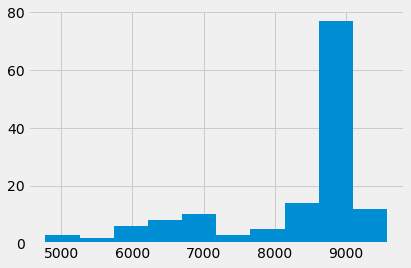

In [89]:
plt.hist(gaia_clean.teff_val)

y= 2223.889431630229 + 0.7263083829470447 *x
0.7619314128428883


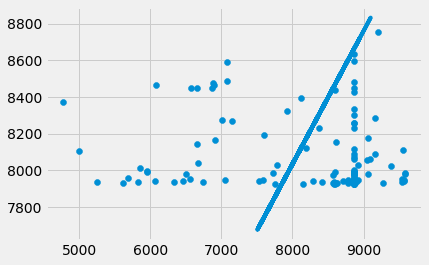

In [88]:
plt.scatter(gaia_clean.teff_val,newpredictions)
b,m = polyfit (test_labels,predictions,1)
np.corrcoef(test_labels,predictions)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(test_labels,b+m*test_labels)
a = np.corrcoef(test_labels,predictions)[0,1]
print(a**2)

The average residual is -233.37680921886079
The standard deviation of the residual is 1142.9402951584138


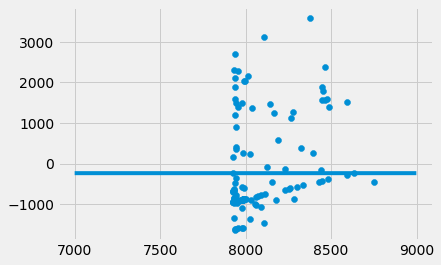

In [92]:
plt.scatter(newpredictions,newpredictions-gaia_clean.teff_val)

avgresF = np.mean(newpredictions-gaia_clean.teff_val)
stdresF = np.std(newpredictions-gaia_clean.teff_val)

x_const=np.arange(7000,9000)
y_const=[avgresF]*len(x_const)
plt.plot(x_const,y_const)


print('The average residual is', avgresF)
print('The standard deviation of the residual is', stdresF)